In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
audi_cars = pd.read_csv("data/audi_cars_data.csv")
list(audi_cars.columns)
audi_cars.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,5900.0,Used,Audi,100,2.0 E,C4 (1991-1994),1992,262000.0,101.0,1984.0,Gasoline
1,6900.0,Used,Audi,100,Avant 2.8 E,C4 (1991-1994),1991,332000.0,174.0,2771.0,Gasoline + LPG
2,5000.0,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,150.0,2598.0,Gasoline
3,19900.0,Used,Audi,100,NaN,C1 (1968-1976),1974,99000.0,115.0,1900.0,Gasoline
4,14999.0,Used,Audi,100,Avant 2.2,C3 (1982-1991),1987,108729.0,137.0,2226.0,Gasoline


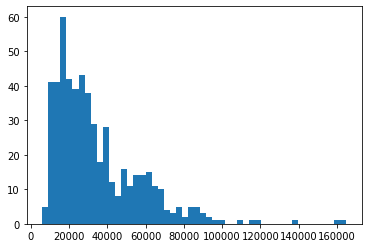

In [47]:
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()
np.std(audi_a3_2000ccm["Price"])
plt.figure()
plt.hist(audi_a3_2000ccm["Price"], bins = 50)
plt.show()

In [48]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='car_price_1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [49]:

N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(200000, 70000) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim=model.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [50]:
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'y_generated[1]':'y_generated[523]'].values
sim_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,15.0248,0.999596,0.604097,3.0,7.0,0.0,-13.15980,35381.4,-0.178417,20.3428,...,36859.0,23325.7,30150.0,50577.9,56575.8,36511.0,30377.6,42326.7,60657.8,33299.2
1,13.7405,0.919625,0.604097,3.0,7.0,0.0,-13.18280,34216.8,-0.165293,16.2018,...,30272.6,17724.8,24050.3,42987.8,48548.5,29933.8,24266.0,35325.0,52320.7,26956.2
2,12.6402,0.929677,0.604097,3.0,7.0,0.0,-9.68777,35450.5,-0.203683,24.8357,...,40377.5,24932.1,32721.0,56040.4,62880.1,39989.5,32977.5,46627.8,67541.5,36325.5
3,13.3408,0.803770,0.604097,3.0,7.0,0.0,-7.87727,33845.3,-0.175080,15.8925,...,27116.8,13826.6,20523.9,40586.7,46479.5,26750.7,20755.5,32463.9,50473.5,23598.4
4,13.3934,0.223716,0.604097,2.0,3.0,0.0,-9.78822,34312.9,-0.169206,16.9440,...,30996.9,18152.8,24627.4,44010.3,49702.3,30651.6,24847.2,36170.2,53567.2,27601.9


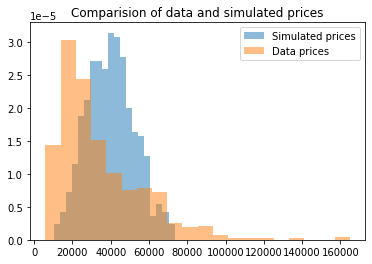

In [51]:
plt.figure()

plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [163]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit = cmdstanpy.CmdStanModel(stan_file='car_price_1_fit.stan')
fit = model_fit.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)


INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_1_fit.stan to exe file /home/DA/project/car_price_1_fit
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_1_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▌        | 00:00 Iteration:  300 / 3000 [ 10%]  (Warmup)








chain 1 |██▌       | 00:03 Iteration:  600 / 3000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:04 Iteration:  800 / 3000 [ 26%]  (Warmup)


chain 1 |███▍      | 00:05 Iteration:  900 / 3000 [ 30%]  (Warmup)






chain 1 |████      | 00:09 Iteration: 1001 / 3000 [ 33%]  (Sampling)
















chain 1 |████▍     | 00:12 Iteration: 1100 / 3000 [ 36%]  (Sampling)

























chain 1 |████▋     | 00:15 Iteration: 1200 / 3000 [ 40%]  (Sampling)























chain 1 |██████████| 00:50 Sampling completed                       
chain 2 |██████████| 00:50 Sampling completed                       
chain 3 |██████████| 00:50 Sampling co


INFO:cmdstanpy:CmdStan done processing.


In [164]:
fit_pd = fit.draws_pd()
fit_pd

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,-41418.1,0.998030,0.000906,10.0,1023.0,0.0,41420.0,30572.2,-0.221315,24.0269,...,33736.9,48928.4,49790.6,38668.5,48846.5,27993.4,43400.3,69074.5,39057.7,45250.7
1,-41418.7,0.853584,0.000906,8.0,255.0,0.0,41421.3,33610.8,-0.221306,22.4806,...,31939.1,56303.9,49504.1,39832.3,43985.4,25499.9,44042.6,68507.4,43270.6,44544.4
2,-41416.7,0.757418,0.000906,10.0,1023.0,0.0,41421.2,32986.1,-0.218897,22.6363,...,37357.8,53843.2,53995.3,35985.7,46217.7,30772.7,42492.8,65975.7,34380.8,43718.8
3,-41416.0,0.988796,0.000906,8.0,323.0,0.0,41417.1,31834.7,-0.218742,23.1576,...,31995.6,52376.1,50195.4,38133.6,44411.5,24659.8,44208.9,65950.9,38320.4,46839.5
4,-41416.3,0.999325,0.000906,9.0,1023.0,0.0,41417.0,32721.9,-0.219089,22.7524,...,31936.0,54539.8,50509.7,37367.4,48130.0,22879.3,43521.1,68858.1,39712.3,44334.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-41418.6,0.937732,0.052505,6.0,95.0,0.0,41423.4,30320.1,-0.219073,23.8776,...,35157.5,49181.2,52390.6,40263.6,45242.9,26899.3,47184.2,71076.5,39390.2,43561.3
7996,-41417.1,0.975774,0.052505,6.0,95.0,0.0,41420.1,33664.7,-0.218970,22.2932,...,33097.6,54454.7,54715.2,40397.8,45566.5,26297.1,48027.2,67160.0,37988.8,47252.0
7997,-41416.8,0.980508,0.052505,5.0,31.0,0.0,41418.1,33400.2,-0.220478,22.5636,...,34150.0,54025.2,53596.5,38599.5,43720.3,24917.8,42989.0,68965.7,39645.6,43979.4
7998,-41417.5,0.894820,0.052505,5.0,47.0,0.0,41419.2,31964.9,-0.218521,23.0076,...,33480.1,50367.3,54373.2,38658.3,44533.3,25300.4,47169.1,66824.2,41739.8,48486.4


In [165]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

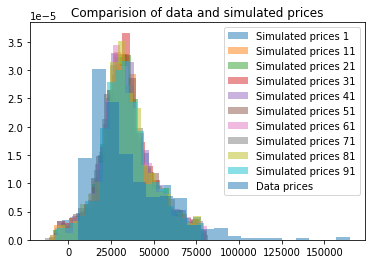

In [166]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [178]:
model_2 = cmdstanpy.CmdStanModel(stan_file='car_price_2_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [179]:
N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(200000, 70000) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim_2=model_2.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [139]:
sim_pd_2 = sim_2.draws_pd()
print(sim_pd_2['lambda'])
prices_sim_pd_2 = sim_pd_2.loc[:, 'y_generated[1]':'y_generated[523]'].values
sim_pd_2.head()

0       53311.9
1       46394.0
2       36831.9
3       50314.0
4       51318.8
         ...   
3995    47453.2
3996    44815.5
3997    40609.9
3998    39845.5
3999    43150.1
Name: lambda, Length: 4000, dtype: float64


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532],lambda
0,12.8566,1.000000,0.266384,3.0,7.0,0.0,-10.22180,20168.4,-0.153516,23.3702,...,30362.0,28254.0,39985.0,41967.0,37458.0,23609.0,55810.0,20711.0,53554.0,53311.9
1,12.2398,0.973769,0.266384,4.0,15.0,0.0,-9.62781,18034.3,-0.177616,22.0529,...,19668.0,17230.0,31048.0,33549.0,27812.0,12194.0,49033.0,8854.0,46780.0,46394.0
2,13.2953,0.985940,0.266384,4.0,15.0,0.0,-10.51060,19540.6,-0.166261,16.0416,...,11886.0,9712.0,22222.0,24732.0,19577.0,4820.0,39423.0,1508.0,36701.0,36831.9
3,14.1499,0.994607,0.266384,4.0,15.0,0.0,-11.82960,20182.5,-0.172914,22.7270,...,24404.0,22318.0,35097.0,37693.0,32245.0,16828.0,53226.0,13696.0,50462.0,50314.0
4,13.1667,0.940248,0.266384,3.0,7.0,0.0,-12.80310,20132.5,-0.176110,23.4234,...,24733.0,22225.0,36414.0,38281.0,33006.0,17419.0,54029.0,14017.0,51676.0,51318.8


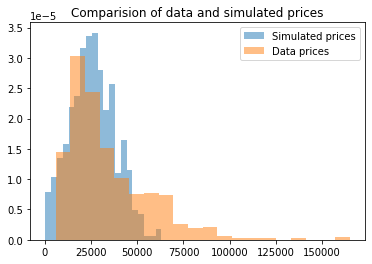

In [140]:
plt.figure()

plt.hist(prices_sim_pd_2[1], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [187]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1_new': audi_a3_2000ccm['Mileage_km'].values,
    'x2_new': audi_a3_2000ccm['Production_year'].values,
}

model_fit_2 = cmdstanpy.CmdStanModel(stan_file='car_price_2_fit.stan')
fit_2 = model_fit_2.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_2_fit.stan to exe file /home/DA/project/car_price_2_fit
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_2_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▎         | 00:00 Status


chain 1 |████▍     | 00:00 Iteration: 1100 / 3000 [ 36%]  (Sampling)




chain 1 |██████▌   | 00:00 Iteration: 1800 / 3000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 2300 / 3000 [ 76%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [192]:
fit_pd_2 = fit_2.draws_pd()
fit_pd_2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532],lambda
0,10.06350,0.669257,0.398824,3.0,7.0,0.0,-7.68794,27206.1,-0.184852,16.3778,...,37861.0,38047.0,26073.0,31762.0,15882.0,31788.0,51494.0,27017.0,32508.0,32431.3
1,12.79770,0.958603,0.398824,3.0,7.0,0.0,-8.30393,25575.2,-0.162521,21.8898,...,50384.0,50059.0,39525.0,44779.0,30686.0,44500.0,62550.0,40716.0,45192.0,45233.8
2,9.96984,0.998515,0.398824,3.0,7.0,0.0,-9.46629,25658.2,-0.176118,19.4525,...,43570.0,43870.0,32341.0,38055.0,22332.0,37510.0,56836.0,33232.0,38648.0,38377.0
3,11.92440,0.827188,0.398824,3.0,7.0,0.0,-7.78713,26148.0,-0.183890,22.1269,...,48636.0,48424.0,37246.0,42797.0,26497.0,42350.0,62706.0,37767.0,43276.0,43078.1
4,12.37760,0.903437,0.398824,3.0,7.0,0.0,-9.34122,24369.0,-0.163112,23.0139,...,51000.0,51492.0,40608.0,45971.0,31294.0,45461.0,63227.0,41613.0,46054.0,46182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9.19956,0.848699,0.449334,2.0,3.0,0.0,-8.36449,27181.4,-0.164693,24.9062,...,57981.0,57613.0,47098.0,51985.0,37747.0,51727.0,69597.0,47864.0,52583.0,52580.8
7996,11.15690,0.865865,0.449334,2.0,7.0,0.0,-4.93419,26737.7,-0.160837,19.8107,...,47139.0,47480.0,36924.0,42169.0,28048.0,42063.0,59252.0,37701.0,42568.0,42467.2
7997,11.09740,0.990246,0.449334,2.0,3.0,0.0,-10.23780,26801.1,-0.167152,18.6717,...,44069.0,44151.0,33780.0,39114.0,24236.0,38443.0,57203.0,34135.0,39164.0,39295.3
7998,12.52460,0.997984,0.449334,3.0,7.0,0.0,-9.64204,25050.6,-0.165129,25.6331,...,56985.0,57120.0,46720.0,51841.0,37059.0,50995.0,69393.0,47311.0,51803.0,51846.5


In [193]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

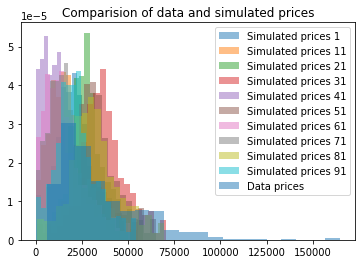

In [194]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()